# Classification model using KNN

### 1. Import libraries

In [4]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload Clinic data

In [5]:
path ='../../../../Data_preprocessing/Prediction OS/RNA+Clinic joined/Clinical_data_and_RNA_15_Features_OS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,OS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,25.347945,1.374775,...,21.08036,21.39991,22.39503,31.44953,21.4144,21.24656,30.26124,29.60417,21.9744,21.12857
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,36.526027,1.374775,...,21.08036,21.39991,22.39503,33.02746,21.4144,21.24656,29.12730,29.61188,21.9744,21.12857
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,68.547945,1.374775,...,21.08036,21.39991,22.39503,33.75531,21.4144,21.24656,27.22907,31.90343,21.9744,21.12857
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.479452,1.374775,...,21.08036,21.39991,29.70759,33.50304,21.4144,21.24656,22.83731,30.35424,21.9744,21.12857
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,63.978082,1.374775,...,21.08036,21.39991,22.39503,33.18274,21.4144,21.24656,22.83731,31.60946,21.9744,21.12857


In [6]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.OS[i]<20: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('OS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,1:42] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0    62.0   0.0   0.0                        2.0   
1    62.0   0.0   0.0                        2.0   
2    62.0   0.0   0.0                        1.0   
3    62.0   0.0   0.0                        3.0   
4    62.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
176  62.0   0.0   0.0                        1.0   
177  62.0   0.0   0.0                        1.0   
178  62.0   0.0   0.0                        1.0   
179  62.0   0.0   0.0                        1.0   
180  62.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                707.0             
1                                                707.0             
2                                                707.0             
3                                                707.0             
4                                  

### 3. Train-Test dataset split

In [7]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [8]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 1 and is: 0.6486


C:\Users\sandr\AppData\Local\Temp/ipykernel_4028/3738168230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
C:\Users\sandr\AppData\Local\Temp/ipykernel_4028/3738168230.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best_k, best_acuracy, 'ro', color ='g')


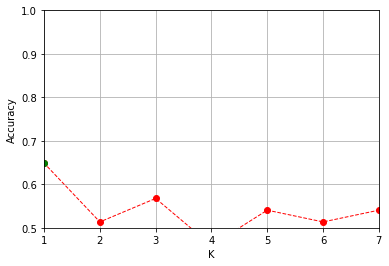

In [9]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [10]:
# Estudio de la mejor métrica
from sklearn import neighbors
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x000002B900426430>,
                     n_neighbors=1)

In [11]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,0,0,0
2,0,1,1
3,1,1,1
4,1,0,0


In [12]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters: " +str(np.mean(result1)))
print("Best result of the cross validation of the model (mahattan) with the best paramters:: " +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters: 0.4514778325123153
Best result of the cross validation of the model (mahattan) with the best paramters:: 0.4931034482758621


#### 6.1. Manhattan model

In [13]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [14]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [15]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 1.0
Final accuracy on the testing dataset (manhattan): 0.4594594594594595


In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0]
 [ 0 77]]
Input data:  [0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0]
Prediction:        [0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0]


In [17]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        77

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[ 8  9]
 [11  9]]
Input data:  [1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1]
Prediction:        [1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0]


In [19]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44        17
           1       0.50      0.45      0.47        20

    accuracy                           0.46        37
   macro avg       0.46      0.46      0.46        37
weighted avg       0.46      0.46      0.46        37

